<a href="https://colab.research.google.com/github/MuneefMumthas/CO653-TEAM-EM/blob/main/CO653-TEAM-EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO653 - Learning Machines and Intelligent Agents

Team mates:

Muneef - 22206529

Entwan - 22135347


###Importing the Libraries

In [116]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing the dataset

In [118]:
train = pd.read_csv('/content/drive/MyDrive/Loan_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Loan_test.csv')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

#Exploratory data analysis (EDA)

####Checking the raw dataset

In [119]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
train.shape

(614, 13)

In [121]:
test.shape

(367, 12)

In [122]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [123]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


###Checking the missing values

In [124]:
# Calculate the percentage of missing values per column
missing_percentage = train.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [125]:
# Calculate the percentage of missing values per column
missing_percentage = test.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.997275
Dependents          2.724796
Self_Employed       6.267030
LoanAmount          1.362398
Loan_Amount_Term    1.634877
Credit_History      7.901907
dtype: float64


In [126]:
missing = train[train.isnull().any(axis=1)]
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


###Handling the missing values by replacing with mean

In [127]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
train = handle_missing_values(train, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [128]:
# Example usage
test = handle_missing_values(test, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [129]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [130]:
#train = train.drop("Loan_ID", axis = 1)

In [131]:
#test = test.drop("Loan_ID", axis = 1)

###Encoding the categorical columns using lable encorder

In [132]:
# Get categorical columns present in the current DataFrame
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
# Dictionary to store mappings
label_mappings_train = {}


for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])
    label_mappings_train[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [133]:
# Get categorical columns present in the current DataFrame
categorical_columns = test.select_dtypes(include=['object', 'category']).columns


label_mappings_test = {}

for column in categorical_columns:
    test[column] = label_encoder.fit_transform(test[column])
    label_mappings_test[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

####Mappings for the encorder

In [134]:
# Print the mappings
for col, mapping in label_mappings_train.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Loan_ID
{'LP001002': np.int64(0), 'LP001003': np.int64(1), 'LP001005': np.int64(2), 'LP001006': np.int64(3), 'LP001008': np.int64(4), 'LP001011': np.int64(5), 'LP001013': np.int64(6), 'LP001014': np.int64(7), 'LP001018': np.int64(8), 'LP001020': np.int64(9), 'LP001024': np.int64(10), 'LP001027': np.int64(11), 'LP001028': np.int64(12), 'LP001029': np.int64(13), 'LP001030': np.int64(14), 'LP001032': np.int64(15), 'LP001034': np.int64(16), 'LP001036': np.int64(17), 'LP001038': np.int64(18), 'LP001041': np.int64(19), 'LP001043': np.int64(20), 'LP001046': np.int64(21), 'LP001047': np.int64(22), 'LP001050': np.int64(23), 'LP001052': np.int64(24), 'LP001066': np.int64(25), 'LP001068': np.int64(26), 'LP001073': np.int64(27), 'LP001086': np.int64(28), 'LP001087': np.int64(29), 'LP001091': np.int64(30), 'LP001095': np.int64(31), 'LP001097': np.int64(32), 'LP001098': np.int64(33), 'LP001100': np.int64(34), 'LP001106': np.int64(35), 'LP001109': np.int64(36), 'LP001112': np.int64(37), 'LP00

In [135]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [136]:
# Print the mappings
for col, mapping in label_mappings_test.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Loan_ID
{'LP001015': np.int64(0), 'LP001022': np.int64(1), 'LP001031': np.int64(2), 'LP001035': np.int64(3), 'LP001051': np.int64(4), 'LP001054': np.int64(5), 'LP001055': np.int64(6), 'LP001056': np.int64(7), 'LP001059': np.int64(8), 'LP001067': np.int64(9), 'LP001078': np.int64(10), 'LP001082': np.int64(11), 'LP001083': np.int64(12), 'LP001094': np.int64(13), 'LP001096': np.int64(14), 'LP001099': np.int64(15), 'LP001105': np.int64(16), 'LP001107': np.int64(17), 'LP001108': np.int64(18), 'LP001115': np.int64(19), 'LP001121': np.int64(20), 'LP001124': np.int64(21), 'LP001128': np.int64(22), 'LP001135': np.int64(23), 'LP001149': np.int64(24), 'LP001153': np.int64(25), 'LP001163': np.int64(26), 'LP001169': np.int64(27), 'LP001174': np.int64(28), 'LP001176': np.int64(29), 'LP001177': np.int64(30), 'LP001183': np.int64(31), 'LP001185': np.int64(32), 'LP001187': np.int64(33), 'LP001190': np.int64(34), 'LP001203': np.int64(35), 'LP001208': np.int64(36), 'LP001210': np.int64(37), 'LP00

In [137]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [138]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [139]:
train["ApplicantIncome"].describe()

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [140]:
train["LoanAmount"].describe()

,LoanAmount
count,614.000000
mean,145.752443
std,84.107233
min,9.000000
25%,100.250000
50%,128.000000
75%,164.750000
max,700.000000


In [141]:
unique = train["Loan_Amount_Term"].unique()
unique

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

###Scaling the numerical columns using standard scaling

In [142]:
# Define the numerical columns that need scaling
high_num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Create a copy of the DataFrame (optional, to avoid modifying the original)
train_scaled = train.copy()
test_scaled = test.copy()

# Apply StandardScaler only to the selected numerical columns
scaler = StandardScaler()
train_scaled[high_num_cols] = scaler.fit_transform(train_scaled[high_num_cols])
test_scaled[high_num_cols] = scaler.fit_transform(test_scaled[high_num_cols])

# Now df_scaled has the scaled numerical features while categorical ones remain unchanged


In [143]:
train_scaled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


###Plots to view the distributions

####Box plots

<Axes: ylabel='CoapplicantIncome'>

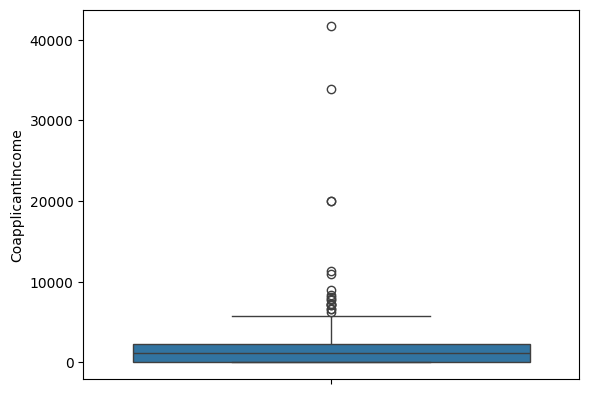

In [144]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["CoapplicantIncome"])

<Axes: ylabel='LoanAmount'>

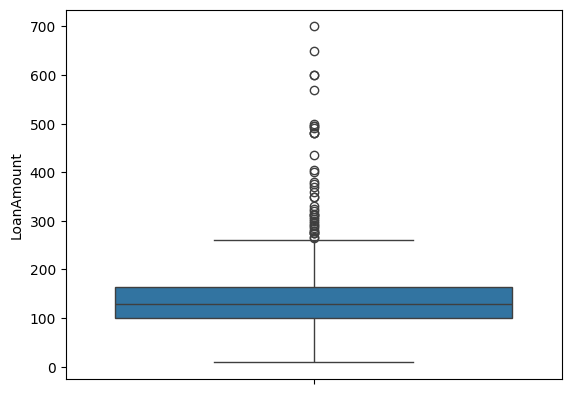

In [145]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["LoanAmount"])

<Axes: ylabel='ApplicantIncome'>

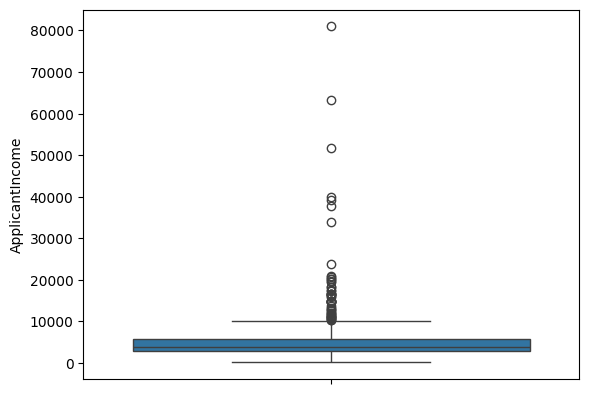

In [146]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["ApplicantIncome"])

####Count plots

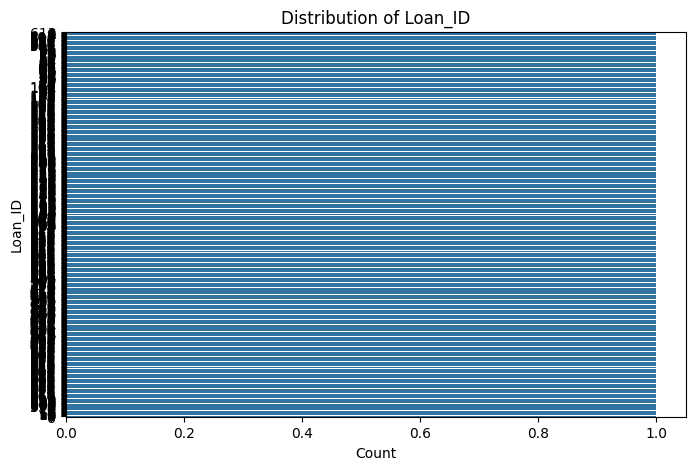

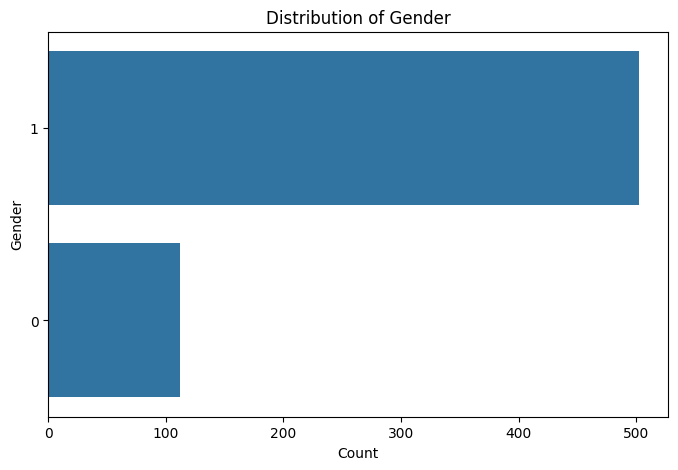

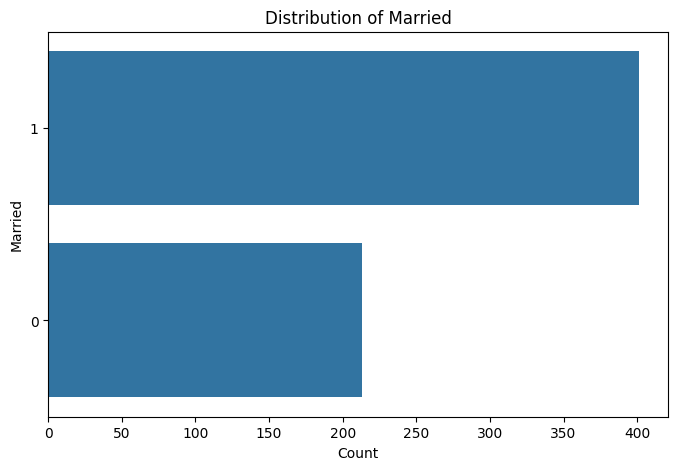

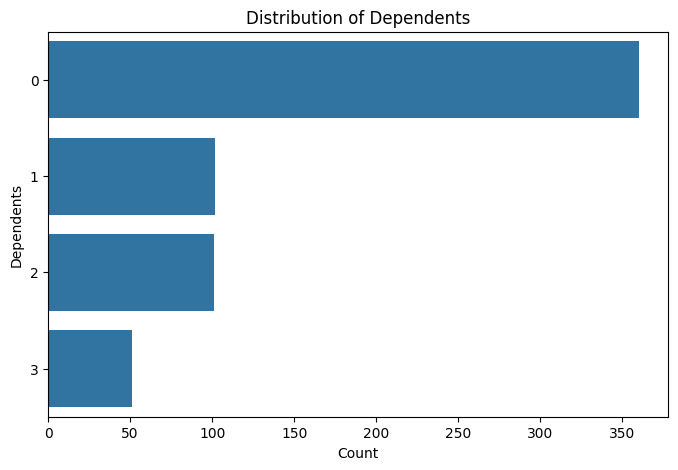

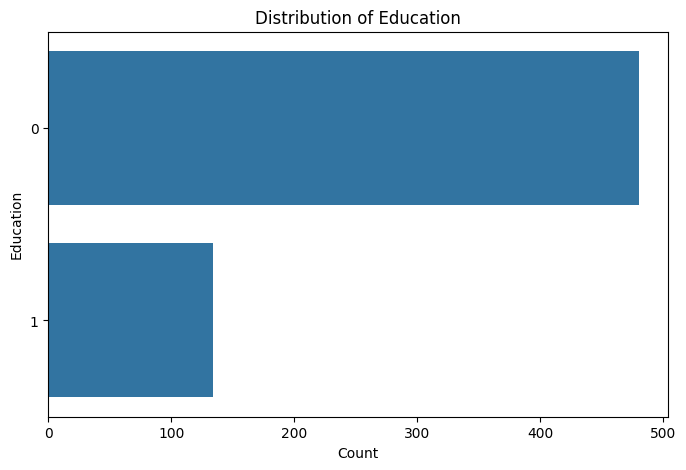

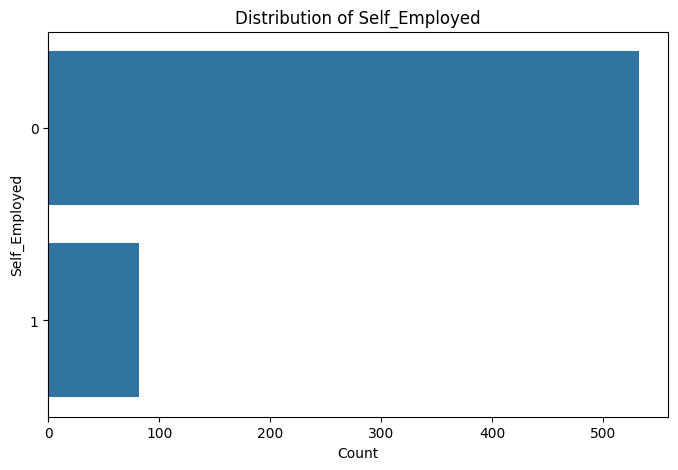

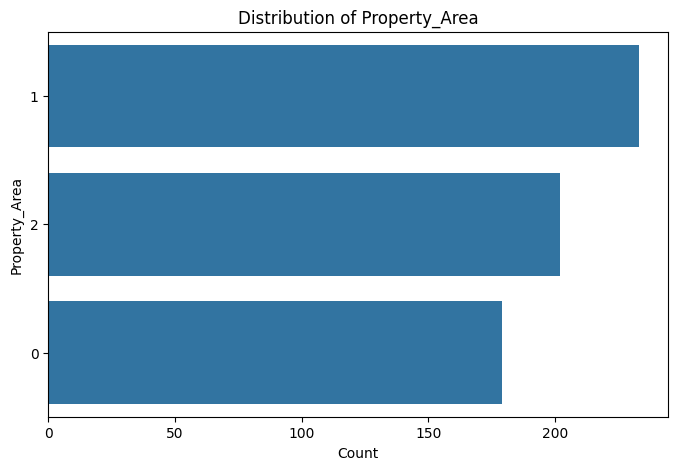

In [147]:
# Plot categorical feature distributions
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=train_scaled[col], order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

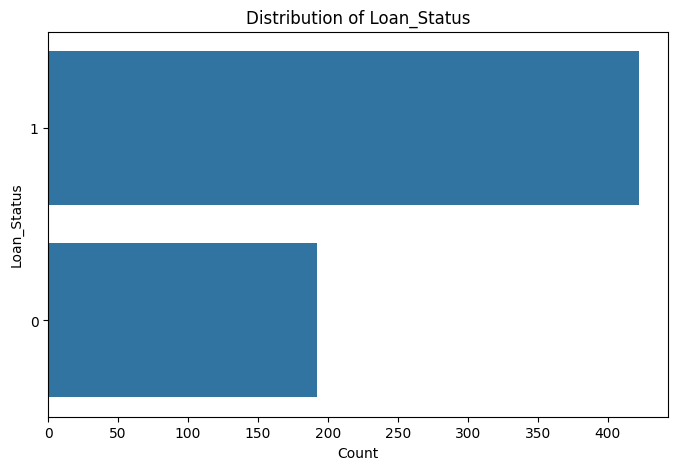

In [148]:
# Plot categorical feature distributions

plt.figure(figsize=(8, 5))
sns.countplot(y=train_scaled["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

####Heatmap

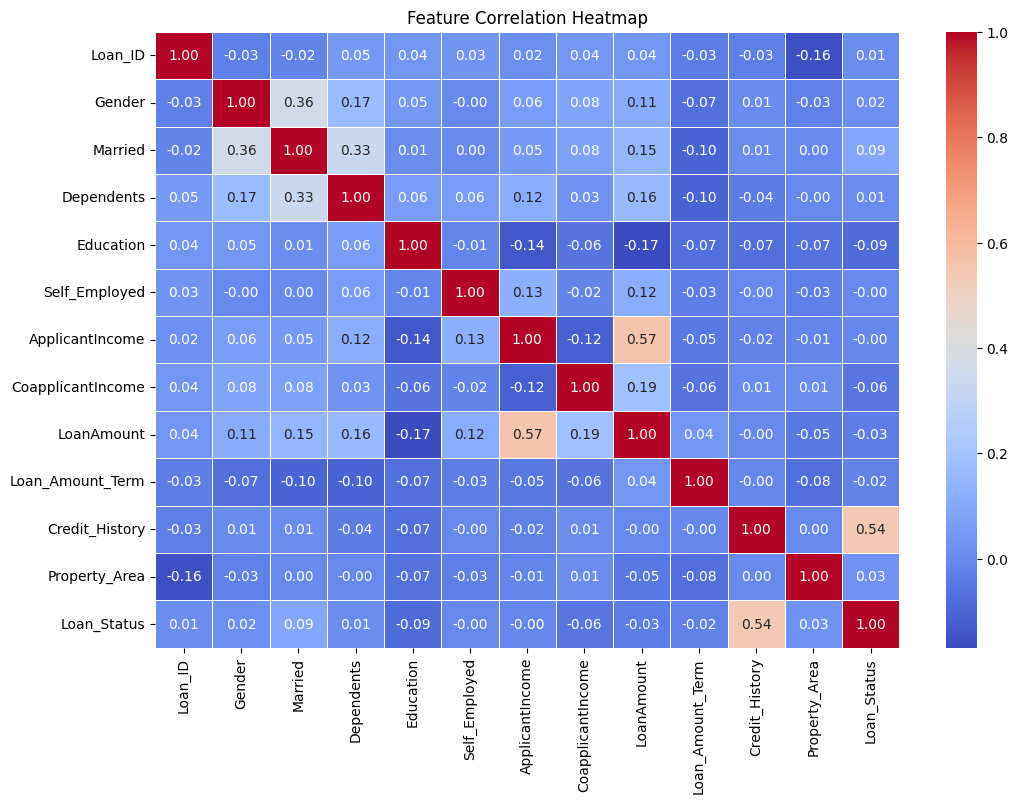

In [149]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


####Pairplot

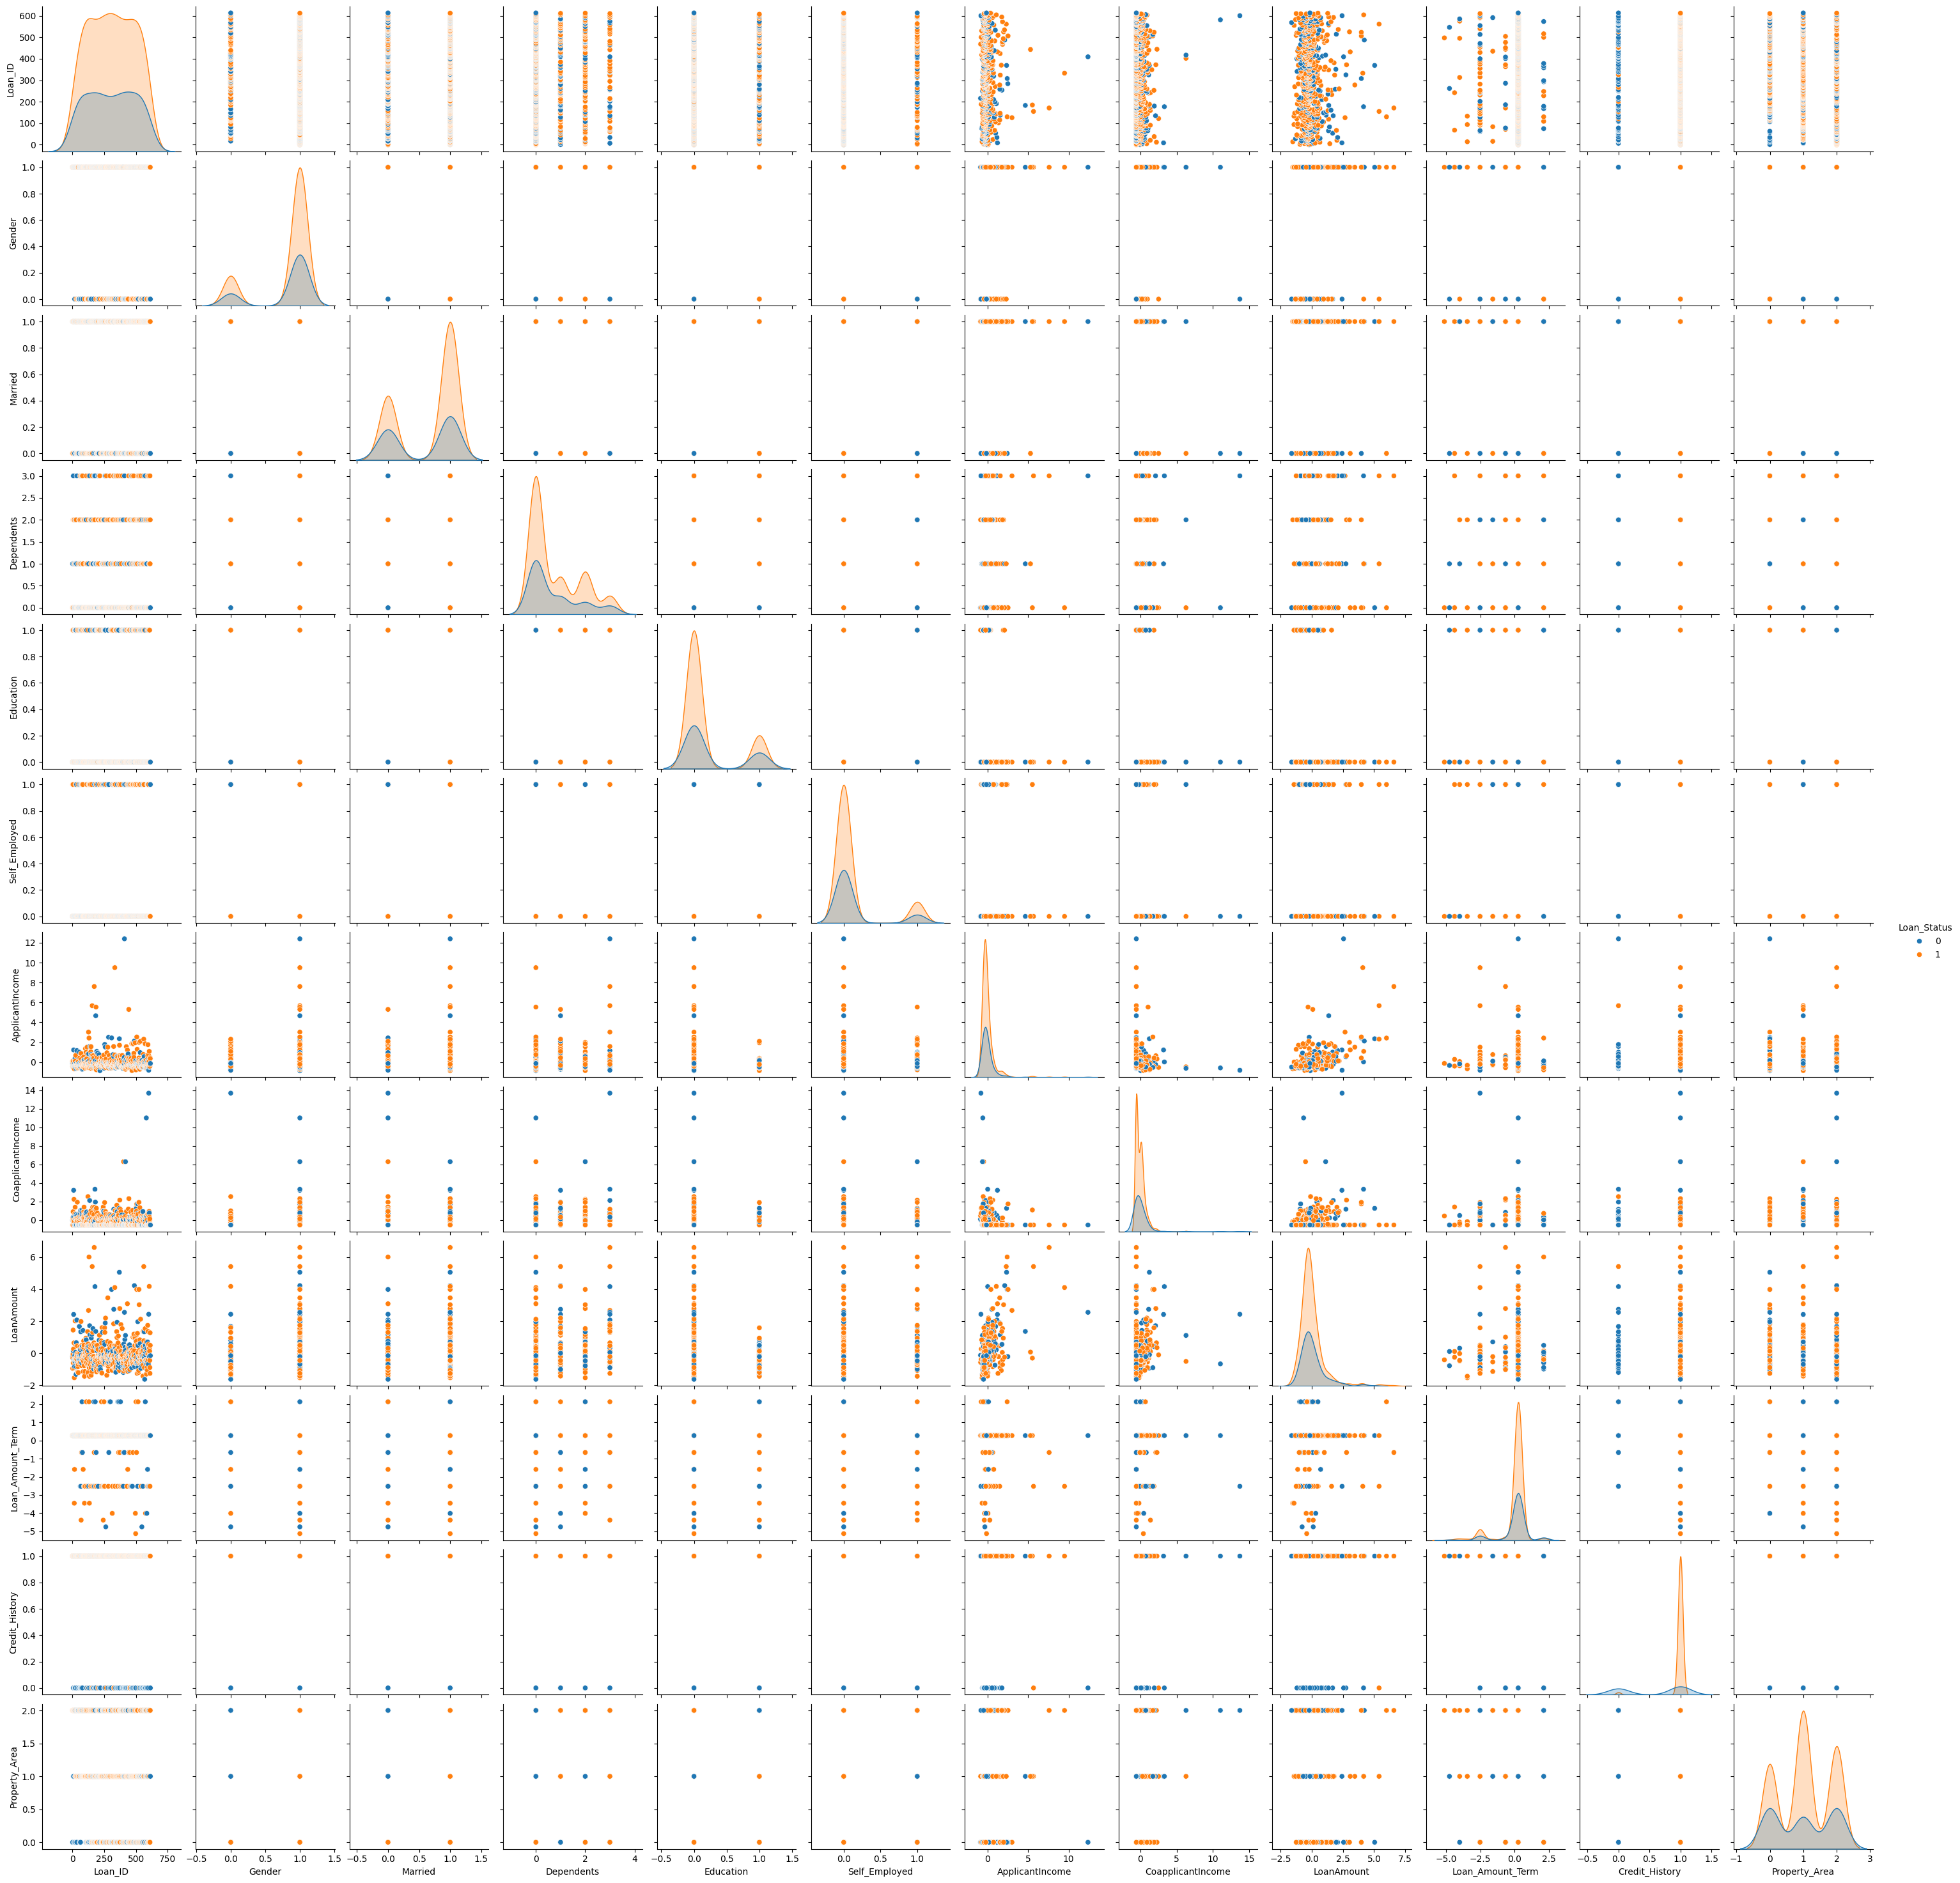

In [150]:
sns.pairplot(train_scaled, hue="Loan_Status")
plt.show()

#Building the model

###Upsampling and downsampling the train data

In my experience:
When I upsample then split into train test, there is a chance of getting overfit because some of the test values are already seen.

But in this we already have the seperate test data we can upsample here.

In [151]:
# Separate majority and minority classes
df_majority = train_scaled[train_scaled["Loan_Status"] == 1]
df_minority = train_scaled[train_scaled["Loan_Status"] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Ensure reproducibility

# Combine majority class with upsampled minority class
train_upsample = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
train_upsample = train_upsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after upsampling
print(train_upsample["Loan_Status"].value_counts())

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement (randomly remove samples)
                                   n_samples=len(df_minority),  # Match minority class count
                                   random_state=42)  # Ensure reproducibility

# Check class distribution after downsampling
print(train_upsample["Loan_Status"].value_counts())


Loan_Status
0    422
1    422
Name: count, dtype: int64
Loan_Status
0    422
1    422
Name: count, dtype: int64


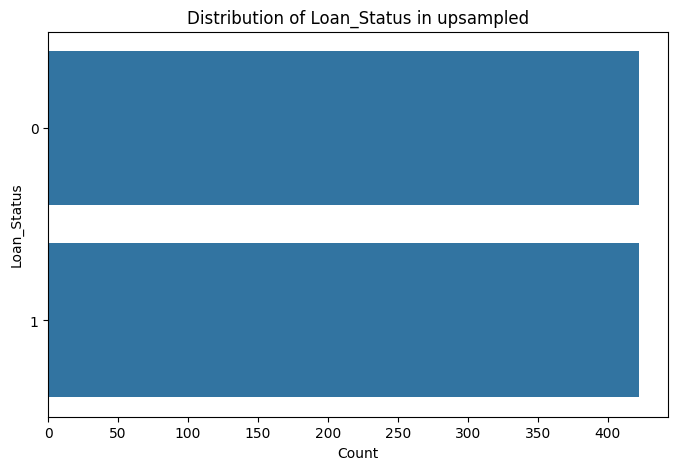

In [152]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train_upsample["Loan_Status"], order=train_upsample["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in upsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [153]:
train_upsample.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,417,1,1,2,0,1,-0.623103,6.285775,1.109579,0.273231,1.0,2,0
1,315,1,1,1,1,0,-0.328381,0.006414,-0.413529,-2.522836,1.0,2,1
2,589,1,1,2,0,1,-0.438635,-0.554487,-0.473025,0.273231,0.0,1,0
3,410,0,0,1,1,1,-0.251711,-0.554487,-0.996594,0.273231,1.0,1,0
4,99,1,1,0,0,0,-0.597054,0.656581,-0.175543,0.273231,1.0,1,1


###Training the model


In [154]:
# Assume df is your dataset
X = train_upsample.drop(columns=["Loan_Status"])  # Features
y = train_upsample["Loan_Status"]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split dataset (80% training, 20% testing)


# Display the shapes of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((675, 12), (169, 12), (675,), (169,))

In [155]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [156]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [167]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [168]:
#Creating a model for csv dataset
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Training the model
history = model_1.fit(X_train, y_train,
                      epochs=50,
                      validation_data=(X_test, y_test),
                      callbacks=[mc, early_stopping],
                      verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5045 - loss: 3.5103 - val_accuracy: 0.4734 - val_loss: 1.9932
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5131 - loss: 1.1795 - val_accuracy: 0.5148 - val_loss: 0.7091
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5043 - loss: 0.7093 - val_accuracy: 0.5799 - val_loss: 0.6860
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4926 - loss: 0.7129 - val_accuracy: 0.4970 - val_loss: 0.8964
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4988 - loss: 0.8087 - val_accuracy: 0.5858 - val_loss: 0.6729
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5231 - loss: 0.7571 - val_accuracy: 0.4970 - val_loss: 1.0295
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5049 - loss: 0.9605 - val_accuracy: 0.5976 - val_loss: 0.6641
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5448 - loss: 0.7197 - val_accuracy: 0.5148 - val_loss

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6645 - loss: 0.6768 - val_accuracy: 0.7337 - val_loss: 0.5518
Epoch 44/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6520 - loss: 0.6201 - val_accuracy: 0.6391 - val_loss: 0.5729
Epoch 45/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6724 - loss: 0.6341 - val_accuracy: 0.6272 - val_loss: 0.6398
Epoch 46/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6971 - loss: 0.5708 - val_accuracy: 0.6509 - val_loss: 0.6106
Epoch 47/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7311 - loss: 0.5551 - val_accuracy: 0.6391 - val_loss: 0.5891
Epoch 48/50
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7062 - loss: 0.5475 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7089 - loss: 0.5481 - val_accuracy: 0.7515 - val_loss: 0.5441
Epoch 49/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7810 - loss: 0.5211 - val_accuracy: 0.7515 - val_loss: 0.5594
Epoch 50/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7183 - loss: 0.5602 - val_accuracy: 0.6391 - val_loss: 0.5985


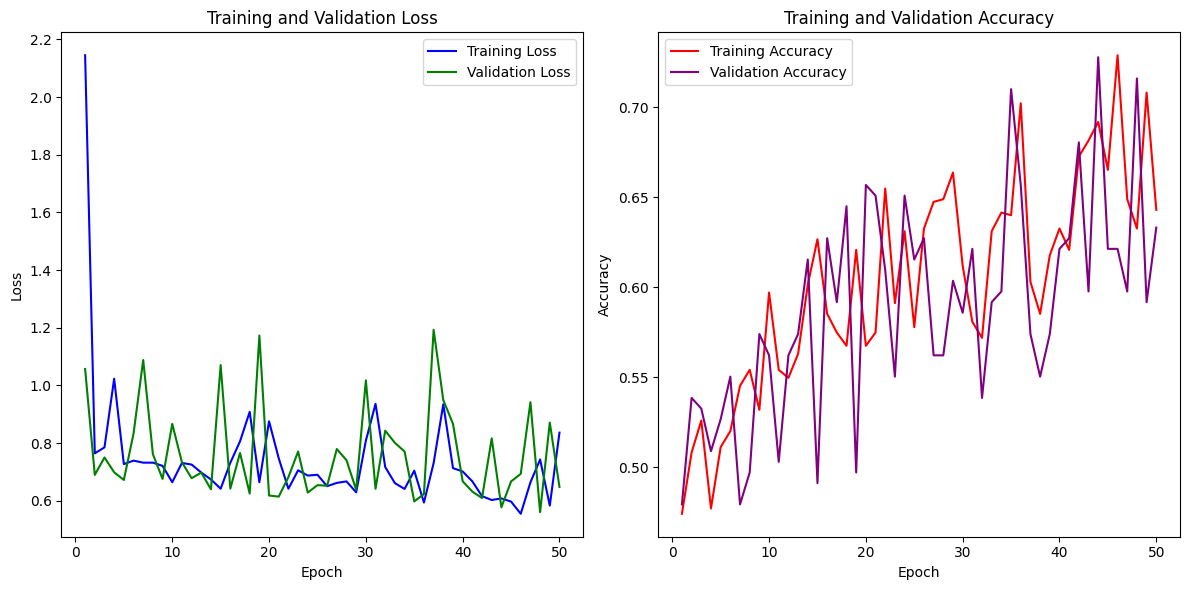

In [160]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy in one figure
plt.figure(figsize=(12, 6))

# First subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='purple')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [161]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")


In [162]:
test_scaled.shape

(367, 12)

In [163]:
test_scaled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2
1,1,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2
2,2,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2
3,3,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2
4,4,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2


In [164]:
test_scaled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2
1,1,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2
2,2,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2
3,3,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2
4,4,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2


In [165]:
# Get model predictions
predictions = model.predict(test_scaled, verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [166]:
# Reverse transform Loan_ID using the stored label mappings
loan_id_mapping = {v: k for k, v in label_mappings_test["Loan_ID"].items()}  # Reverse the dictionary
loan_ids = [loan_id_mapping[i] for i in test_scaled["Loan_ID"].values]  # Map back to original Loan_IDs

# Convert predictions to 'Y' and 'N'
predicted_classes = np.where(predictions > 0.5, "Y", "N")

# Ensure Loan_IDs and predictions have the same length
assert len(loan_ids) == len(predicted_classes), "Mismatch in Loan_ID and predictions length!"

# Create a DataFrame for submission
submission = pd.DataFrame({
    "Loan_ID": loan_ids,  # Using reversed Loan_IDs
    "Loan_Status": predicted_classes.flatten()
})

# Save to CSV
submission.to_csv("/content/drive/MyDrive/submission.csv", index=False)

print("Predictions saved as submission.csv")


Predictions saved as submission.csv
